In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import vorpy as vp
from stdpaths import linepath, ringpath

/home/crashoverride/miniforge3/envs/2024_05_work/lib/python3.12/site-packages/juliacall/__init__.py:237: UserWarning: Julia was started with multiple threads but multithreading support is experimental in JuliaCall. It is recommended to restart Python with the environment variable PYTHON_JULIACALL_HANDLE_SIGNALS=yes set, otherwise you may experience segfaults or other crashes. Note however that this interferes with Python's own signal handling, so for example Ctrl-C will not raise KeyboardInterrupt. See https://juliapy.github.io/PythonCall.jl/stable/faq/#Is-PythonCall/JuliaCall-thread-safe? for further information. You can suppress this warning by setting PYTHON_JULIACALL_HANDLE_SIGNALS=no.
  warnings.warn(


Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


  Activating project at `~/Dropbox/code/vorpy/julia`
Precompiling weighted_biot_savart_integrator
  ✓ weighted_biot_savart_integrator
  1 dependency successfully precompiled in 1 seconds. 70 already precompiled.


In [2]:
THREADED = False

In [7]:
DTYP = np.float64
LINELENGTH = 10_000
NUMSEGMENTS = 1000
print('Segment length:', LINELENGTH/NUMSEGMENTS)
CRADIUS = 5
CIRCULATION = 1
vor = linepath(LINELENGTH, NUMSEGMENTS, DTYP, CRADIUS, CIRCULATION)

NUMFPS = 100
FPI = 1
FPF = 60
fps = np.zeros((NUMFPS, 3), dtype=DTYP)
fps[:, 1] = np.linspace(FPI, FPF, num=NUMFPS, dtype=DTYP)

Segment length: 10.0


In [8]:
t0 = time.time_ns()
velnum = vor.velfp(fps, 1e-6, 1e0, THREADED)
velana = vor.velfp_lamboseen(fps)
t1 = time.time_ns()
print(f"Elapsed time: {(t1 - t0) / 1e6} ms")

Elapsed time: 32.515957 ms


Mean error: 0.0006484548609968513
Max error: 0.001437145511253268
Min error: 0.00026504817660738924


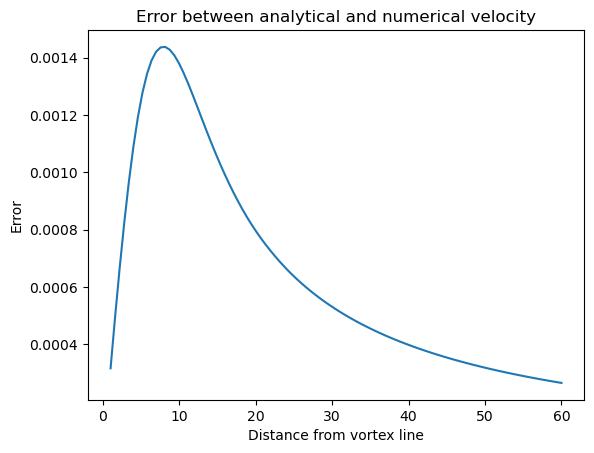

In [9]:
errvec = np.abs(velana - velnum[:, 2])
print('Mean error:', np.mean(errvec))
print('Max error:', np.max(errvec))
print('Min error:', np.min(errvec))

plt.plot(fps[:, 1], errvec)
plt.title('Error between analytical and numerical velocity')
plt.xlabel('Distance from vortex line')
plt.ylabel('Error')
plt.show()

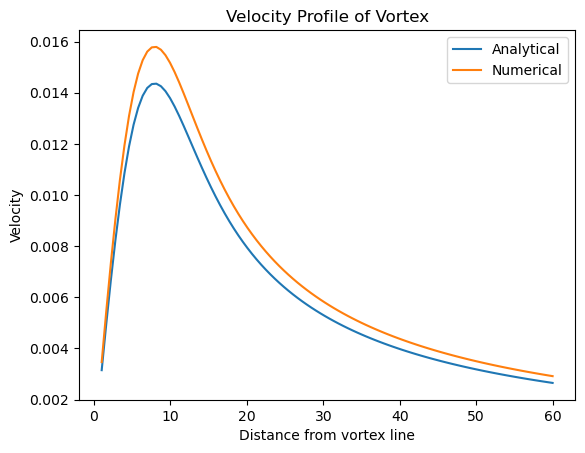

In [10]:
plt.plot(fps[:, 1], velana, label='Analytical')
plt.plot(fps[:, 1], velnum[:, 2], label='Numerical')
plt.title('Velocity Profile of Vortex')
plt.xlabel('Distance from vortex line')
plt.ylabel('Velocity')
plt.legend()
# plt.ylim(0, 2)
plt.show()

In [7]:
import scipy.integrate as spi

In [43]:
DTYP = np.float64
RADIUS = 5
crad = DTYP(RADIUS * 1e-4)
CIRC = 1
NUMSEGMENTS = 100

ringvor = ringpath(RADIUS, NUMSEGMENTS, DTYP, crad, CIRC)

In [44]:
velring = ringvor.vel(1e-6, 1e-2, THREADED)

In [45]:
print('Segments have a length of about:', np.linalg.norm(ringvor.vpps[1] - ringvor.vpps[0]))

Segments have a length of about: 0.3141075907812829


In [46]:
print(np.mean(velring[:, 2]))
print(np.max(velring[:, 2]))
print(np.min(velring[:, 2]))

0.30689508974581947
0.30689508974931556
0.30689508974242763


In [49]:
EPSILON = 1e-1

# d r / d t = wbs
def odefn(t, flattenedvpps):
    ringvor.vpps = flattenedvpps.reshape(-1, 3)
    return ringvor.vel(1e-6, 1e-2, THREADED).flatten()

TSTOP = 0.1
sol = spi.solve_ivp(odefn, (0, TSTOP), ringvor.vpps.flatten(), t_eval=np.arange(0, TSTOP, EPSILON))

KeyboardInterrupt: 

In [ ]:
sol.y

time: 0.0  vel: 0.3068672361263515
time: 0.1  vel: 0.306898011873588
time: 0.2  vel: 0.30695436319948444
time: 0.30000000000000004  vel: 0.3069945806732673
time: 0.4  vel: 0.3069222494819692
time: 0.5  vel: 0.30661384031934963
time: 0.6000000000000001  vel: 0.30602006623910394
time: 0.7000000000000001  vel: 0.30535322713625135
time: 0.8  vel: 0.30534928687539464
time: 0.9  vel: 0.30757810808543107
time: 1.0  vel: 0.31467225988791886
time: 1.1  vel: 0.3298176358318554
time: 1.2000000000000002  vel: 0.35346326996948135
time: 1.3  vel: 0.373393882543098
time: 1.4000000000000001  vel: 0.34574534358691816
[[-2.77562825e-05 -1.01432391e-06  3.06867236e-01]
 [ 1.70019382e-05  1.56170931e-06  3.06900712e-01]
 [-1.68227300e-05 -2.82045610e-06  3.06872782e-01]
 [ 1.65235459e-05  4.10048164e-06  3.06907608e-01]
 [-1.10539066e-06 -4.98585154e-07  3.06851061e-01]
 [-2.80712139e-05 -1.07384885e-05  3.06914019e-01]
 [ 4.63154985e-05  2.13894537e-05  3.06896535e-01]
 [-2.57982598e-05 -1.40892961e-05  

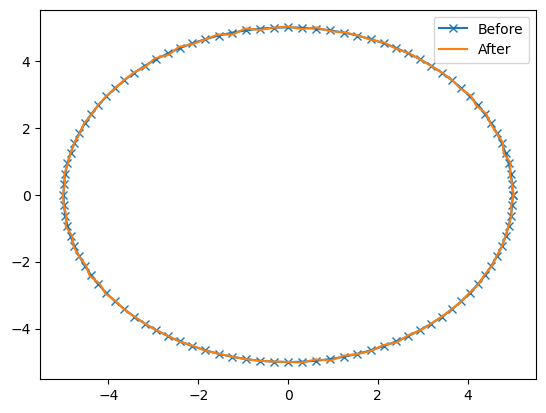

In [38]:

vppsbefore = ringvor.vpps.copy()
velringbefore = ringvor.vel(1e-6, 1e-4, THREADED)
for tstep in np.arange(0, 1.5, EPSILON):
    velring = ringvor.vel(1e-6, 1e-4, THREADED)
    ringvor.vpps += EPSILON * velring
    print('time:', tstep, ' vel:', velring[0, 2])


vppsafter = ringvor.vpps.copy()
velringafter = ringvor.vel(1e-6, 1e-4, THREADED)
print(velringbefore)
print(velringafter)
print(velringafter - velringbefore)

plt.plot(vppsbefore[:, 0], vppsbefore[:, 1], 'x-', label='Before')
plt.plot(vppsafter[:, 0], vppsafter[:, 1], label='After')
plt.legend()
plt.show()